# Calculating solar position in Python

This tutorial demonstrates how to calculate solar positions in Python using the [pvlib-python](https://pvlib-python.readthedocs.io/) library.

The notebook is hosted on Google Colab, which is an interactive computing environment that allows you to run Python Jupyter Notebooks in your browser without having to install Python.

## Step 0
As a first step, you should familiarize yourself with Python and Google Colab. The notebook contains two different types of cells: code cells, which can be execute,d and text cell,s which can contain words and pictures.

To execute the code in a cell, click "Ctrl+Enter". Try and execute the code cell below. If done correctly, you should see the answer to the simple math question below the cell.

In [1]:
a = 5
b = 3

print(a + b)

8


## Step 1: Install and load packages

The first step is to install and import some necessary Python packages.

Remember to execute the cells, simply click the cell and then Ctrl+Enter.

In [2]:
# Install pvlib on Google Colab, as this is not a standard package.
!pip install pvlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 91.5 MB/s eta 0:00:00


In [3]:
import pvlib  # library for PV and solar calculations
import numpy as np  # library for math and linear algebra
import pandas as pd  # library for data analysis
import matplotlib.pyplot as plt  # library for plotting

## Step 2: Define a location

A location is defined by a latitude and longitude according to the convention of [ISO 6709](https://en.wikipedia.org/wiki/ISO_6709). The convention is that latitude is in degrees north of the equator and the longitude is in degrees east of the prime meridian.

👉 **Action**: Complete the location object below by adding the missing longitude corresponding to DTU Building 208:

In [6]:
location = pvlib.location.Location(
    latitude=55.7874,
    longitude=12.5200,
)

## Step 3: Define time stamps

The next step is to define the time stamps for which you want to calculate solar positions. It is important to specify the timezone, as otherwise UTC will be assumed.

For more information on available timezones, see the [pvlib documentation on timezones](https://pvlib-python.readthedocs.io/en/stable/user_guide/modeling_topics/timetimezones.html).

👉 **Action**: For the code cell below to execute, you need to add the end time (should be at 23:59 on the same date as the start date)!

In [7]:
times = pd.date_range(
    start='2026-01-05 00:00',
    end='2026-01-05 23:59',  # add the end time!
    freq='1min',  # frequency
    tz='Europe/Copenhagen',  # timezone
)

times

DatetimeIndex(['2026-01-05 00:00:00+01:00', '2026-01-05 00:01:00+01:00',
               '2026-01-05 00:02:00+01:00', '2026-01-05 00:03:00+01:00',
               '2026-01-05 00:04:00+01:00', '2026-01-05 00:05:00+01:00',
               '2026-01-05 00:06:00+01:00', '2026-01-05 00:07:00+01:00',
               '2026-01-05 00:08:00+01:00', '2026-01-05 00:09:00+01:00',
               ...
               '2026-01-05 23:50:00+01:00', '2026-01-05 23:51:00+01:00',
               '2026-01-05 23:52:00+01:00', '2026-01-05 23:53:00+01:00',
               '2026-01-05 23:54:00+01:00', '2026-01-05 23:55:00+01:00',
               '2026-01-05 23:56:00+01:00', '2026-01-05 23:57:00+01:00',
               '2026-01-05 23:58:00+01:00', '2026-01-05 23:59:00+01:00'],
              dtype='datetime64[ns, Europe/Copenhagen]', length=1440, freq='min')

## Step 4: Calculate solar position

Once we have defined a location and the time stamps for which we want to calculate solar position for, the solar positions can be calculated using the  convenient [``.get_solarposition``](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.location.Location.get_solarposition.html#pvlib.location.Location.get_solarposition) function of the location class:

In [ ]:
solarposition = location.get_solarposition(times)

solarposition.head()  # Inspect the first 5 rows

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2026-01-05 00:00:00+01:00,146.734768,146.734768,-56.734768,-56.734768,353.651808,-5.145901
2026-01-05 00:01:00+01:00,146.749717,146.749717,-56.749717,-56.749717,354.071523,-5.146211
2026-01-05 00:02:00+01:00,146.763642,146.763642,-56.763642,-56.763642,354.491516,-5.146521
2026-01-05 00:03:00+01:00,146.776541,146.776541,-56.776541,-56.776541,354.911768,-5.146831
2026-01-05 00:04:00+01:00,146.788413,146.788413,-56.788413,-56.788413,355.332260,-5.147142


Notice how the ``solarposition`` DataFrame has some columns called ``apparent_``, which account for minor deviations near sunrise and sunset due to atmospheric refraction. For this course you can ignore these affects and thus use the columns: zenith, elevation, and azimuth.

## Step 5: Plot the solar position
👉 **Action**: In this step, you need to plot the solar position calculated in the previous step.

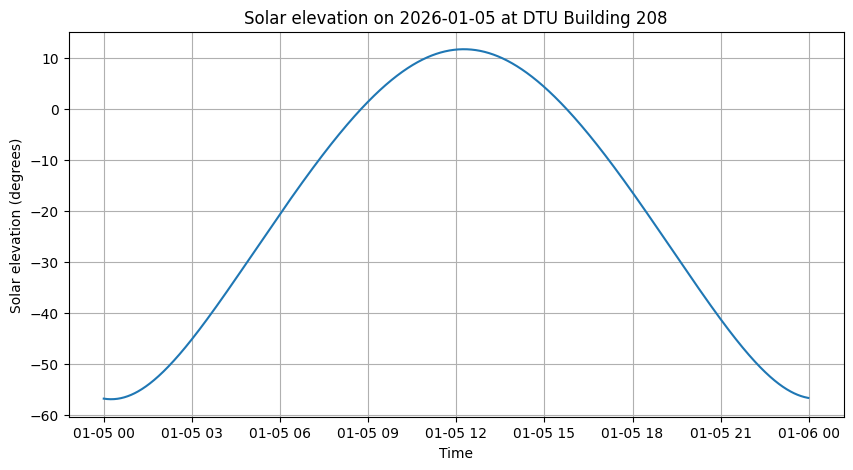

In [9]:
# Write your code here

solarposition = location.get_solarposition(times)

plt.figure(figsize=(10, 5))
plt.plot(solarposition.index, solarposition['elevation'])

plt.xlabel('Time')
plt.ylabel('Solar elevation (degrees)')
plt.title('Solar elevation on 2026-01-05 at DTU Building 208')
plt.grid(True)

plt.show()

## Step 6: Determine the highest solar elevation

In the last step of this tutorial, you need to determine the highest solar elevation for the investigated day. Note, the information that you need is available in the ``solarposition`` DataFrame.

👉 **Action**: Once you have completed this step, submit your result on Learn under Quizzes.

In [11]:
# Write your code here
highest_elevation = solarposition['elevation'].max()
highest_elevation


11.629429894108645